## Machine Learning Project: Playlist Generator using Machine Learniing
--- 

#### Project Steps
1. Understand problem and determine a method of attack
2. Get the Data
3. Explore, Understand & Visualize the data
4. Prepare, Clean & Feature Select the data
5. Create and try a few models & Test the Model and Fine tune parameters
6. Display Solution


In [18]:
#Projecct Imports

import numpy as np
import pandas as pd
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from spotipy.oauth2 import SpotifyOAuth
import credentials 
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
#get API credentials from credentials file
client_ID, client_SECRET, scope, redirect_url = credentials.get_credentials()

## 2. Get the Data

- get users song data through spotify API
- get general song data from kaggle data set

In [ ]:
#get users playlist data and store the song (aka tracks) information in a list
client_credentials_manager = SpotifyClientCredentials(client_id=client_ID, client_secret=client_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

spotify_ID ='0jIAWlLSfLtrvaSmKPw9Nf' #playlist_link = https://open.spotify.com/playlist/0jIAWlLSfLtrvaSmKPw9Nf?si=5bb4f07bf3df4e24

track_info = []
for i in [0,100,200,300,400,500,600]:
    for x in sp.playlist_items(spotify_ID,limit=100, offset=i)["items"]:
        
        y = x["track"]["uri"]
        track_info.append(sp.audio_features(y)[0])


In [15]:
#turn the user's playlist song data into a data frame and save as csv
user_df = pd.DataFrame(track_info)
user_df.to_csv("Dataset/user_playlist.csv")


In [33]:
#get kaggle dataset data
spotify_df = pd.read_csv("Dataset/dataset.csv")
spotify_df = spotify_df.sample(1200)


## 3. Explore, understand & vizulize the data


In [40]:
spotify_df.sample(30)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,label
104867,0.6030,0.8420,9,-8.393,0,0.0466,0.140000,0.000000,0.1990,0.7410,90.447,227013,4,0
29688,0.5650,0.9580,2,-5.341,1,0.0637,0.003750,0.522000,0.7090,0.0762,122.975,450735,4,0
52138,0.5310,0.2560,5,-14.161,1,0.0253,0.411000,0.000012,0.3770,0.3550,82.246,201986,3,0
35266,0.7210,0.6620,6,-6.006,0,0.0506,0.618000,0.000000,0.3040,0.8830,171.978,138893,4,0
59205,0.5400,0.5770,7,-9.545,0,0.0268,0.004150,0.620000,0.1520,0.1640,94.988,235415,4,0
59916,0.4230,0.8530,1,-10.133,1,0.0382,0.000440,0.690000,0.1450,0.1070,89.977,80948,4,0
39463,0.9100,0.3740,8,-9.844,0,0.1990,0.075700,0.003010,0.1540,0.4320,104.042,160725,4,0
61642,0.2080,0.9310,4,-2.792,0,0.0587,0.001200,0.000232,0.3010,0.4380,146.109,302173,4,0
19926,0.5320,0.8210,7,-5.126,1,0.0323,0.055300,0.001400,0.1130,0.3680,118.464,292386,4,0
4194,0.0877,0.0452,4,-22.712,0,0.0431,0.988000,0.936000,0.1090,0.0353,85.425,201651,4,0


In [41]:
user_df.sample(30)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
488,0.351,0.947,5,-4.965,1,0.0503,0.003820,0.000002,0.5590,0.859,153.762,audio_features,2zMlWt4aYreVczVERFK94w,spotify:track:2zMlWt4aYreVczVERFK94w,https://api.spotify.com/v1/tracks/2zMlWt4aYreV...,https://api.spotify.com/v1/audio-analysis/2zMl...,240147,4
438,0.268,0.459,7,-6.948,0,0.0346,0.378000,0.000000,0.1190,0.172,64.223,audio_features,7ccI9cStQbQdystvc6TvxD,spotify:track:7ccI9cStQbQdystvc6TvxD,https://api.spotify.com/v1/tracks/7ccI9cStQbQd...,https://api.spotify.com/v1/audio-analysis/7ccI...,179200,4
91,0.392,0.476,1,-7.583,1,0.0249,0.397000,0.000163,0.3090,0.234,78.031,audio_features,1xsYj84j7hUDDnTTerGWlH,spotify:track:1xsYj84j7hUDDnTTerGWlH,https://api.spotify.com/v1/tracks/1xsYj84j7hUD...,https://api.spotify.com/v1/audio-analysis/1xsY...,267597,4
413,0.617,0.704,6,-7.610,0,0.0258,0.171000,0.000000,0.0924,0.570,91.541,audio_features,1zYZs8Vbjhbzx5M3olcRnm,spotify:track:1zYZs8Vbjhbzx5M3olcRnm,https://api.spotify.com/v1/tracks/1zYZs8Vbjhbz...,https://api.spotify.com/v1/audio-analysis/1zYZ...,180617,4
423,0.634,0.786,7,-5.093,1,0.0411,0.129000,0.000000,0.1820,0.653,82.003,audio_features,6LnIxE8CqkK7faQV76nEHS,spotify:track:6LnIxE8CqkK7faQV76nEHS,https://api.spotify.com/v1/tracks/6LnIxE8CqkK7...,https://api.spotify.com/v1/audio-analysis/6LnI...,189960,4
193,0.595,0.594,9,-12.682,0,0.0326,0.563000,0.033900,0.1140,0.703,156.342,audio_features,4XxMVIDKRAYKlZ6pLt9zJ2,spotify:track:4XxMVIDKRAYKlZ6pLt9zJ2,https://api.spotify.com/v1/tracks/4XxMVIDKRAYK...,https://api.spotify.com/v1/audio-analysis/4XxM...,257813,4
430,0.476,0.864,11,-4.025,1,0.0946,0.156000,0.000000,0.0982,0.530,180.316,audio_features,1BVzLiBS3MWmXzqcxBFJDt,spotify:track:1BVzLiBS3MWmXzqcxBFJDt,https://api.spotify.com/v1/tracks/1BVzLiBS3MWm...,https://api.spotify.com/v1/audio-analysis/1BVz...,179187,4
189,0.476,0.979,4,-3.506,0,0.1320,0.001400,0.007290,0.0944,0.416,140.404,audio_features,5arVt2Wg0zbiWwAOZef2Nl,spotify:track:5arVt2Wg0zbiWwAOZef2Nl,https://api.spotify.com/v1/tracks/5arVt2Wg0zbi...,https://api.spotify.com/v1/audio-analysis/5arV...,202053,4
390,0.609,0.930,1,-2.542,1,0.0322,0.009290,0.001780,0.0730,0.809,126.916,audio_features,0tA4vY3mw5rU9a0DAwuy7e,spotify:track:0tA4vY3mw5rU9a0DAwuy7e,https://api.spotify.com/v1/tracks/0tA4vY3mw5rU...,https://api.spotify.com/v1/audio-analysis/0tA4...,184627,4
514,0.439,0.867,4,-7.722,1,0.0618,0.009070,0.000009,0.6790,0.318,129.103,audio_features,0bIGNGUqgpB82sAksxonkZ,spotify:track:0bIGNGUqgpB82sAksxonkZ,https://api.spotify.com/v1/tracks/0bIGNGUqgpB8...,https://api.spotify.com/v1/audio-analysis/0bIG...,279907,4


/var/folders/b5/55ht82ds3d3fwnh3lyxrny_w0000gn/T/ipykernel_59990/3815407600.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = user_df.corr()


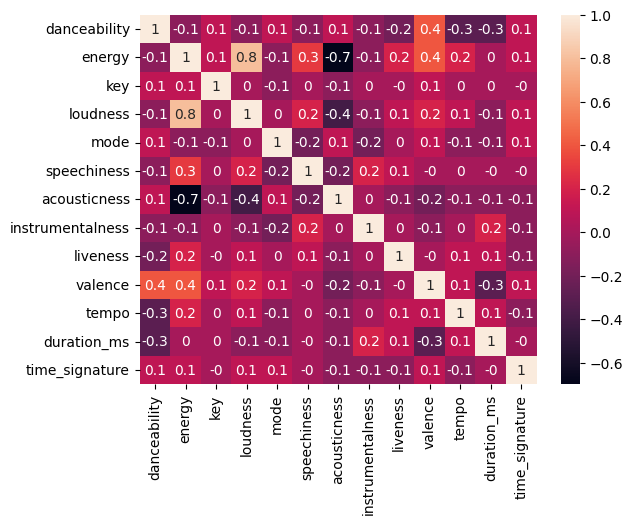

In [19]:
corr_matrix = user_df.corr()
corr_matrix = round(corr_matrix,1)
sn.heatmap(corr_matrix, annot=True)
plt.show()

## 4. Clean and prepare data

In [34]:
#general data
spotify_df.drop(["Unnamed: 0", "track_id", "artists", "album_name", "track_name", "popularity", "explicit", "track_genre"], axis="columns", inplace=True)
cols = spotify_df.columns.tolist()
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 12]
new_cols = [cols[i] for i in order]
spotify_df = spotify_df[new_cols]
spotify_df['label'] = 0

# user specific data
library_df = pd.read_csv("Dataset/user_playlist.csv")
library_df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis='columns', inplace=True)
library_df.drop("Unnamed: 0", axis="columns", inplace=True)
library_df['label'] = 1

#combine data sets to make one master set with labels
data = [library_df, spotify_df]
combine_df = pd.concat(data)
combine_df.to_csv("Dataset/final.csv")

## 5. Train Model and fine tune parameters

In [48]:
X = combine_df.drop('label', axis="columns")
y = combine_df['label']

# Split the data into training and test sets (add seed (i.e.) random state and a fixed set of labeled output data 60% No and 30% yes (i.e. stratify))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=200000, stratify = y)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
percision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\nF1 Score:{f1}\nPercision: {percision}\nRecall: {recall}")

"""
Fine-tuning Hyperparameters didn't result in an increase of performance

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
y_pred_hyper = rf_random.predict(X_test)

print("-------------hyperparameters-----------------------")
results_display(y_test, y_pred_hyper)
print("-------------best parameters-----------------------")
print(rf_random.best_params_)
"""


Accuracy: 0.7769230769230769
F1 Score:0.6133333333333333
Percision: 0.647887323943662
Recall: 0.5822784810126582


## 6. Display solution

- use spotify api to pull top_100 songs and recommend a small subset of them for the user as a new playlist

In [ ]:
top_100 ='37i9dQZF1DXcBWIGoYBM5M' #playlist_link = https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M?si=b39e1d61b10a462c

top100_uris = []
for x in sp.playlist_items(top_100)["items"]:
    y = x["track"]["uri"]
    top100_uris.append(sp.audio_features(y)[0])


final_df = pd.DataFrame(top100_uris)
result_df = final_df.copy()

final_df = final_df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis='columns')

y_pred = rf.predict(final_df)

result_df['results'] = y_pred
result_df = result_df[['results','uri']]
result_df = result_df[result_df.results == 1]


In [37]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id=client_ID, client_secret=client_SECRET,redirect_uri=redirect_url))

In [47]:
new_play = sp.user_playlist_create(user='31maatcac72uzwwtlzaz5jnszmxe', name="New Song Suggestions", public=False, collaborative=False, description='Hello Mitchell, Please see your new music reccomendations!')


result_list = result_df.uri.values.tolist()
sp.user_playlist_add_tracks(user='31maatcac72uzwwtlzaz5jnszmxe', playlist_id=new_play.get('id'), tracks=result_list, position=None)

{'snapshot_id': 'Myw1OWRjZTVkYjMwYjM2ZDM1NTdhY2E0MzIzZDRmMDQ1Njk2M2Y3MWY1'}